# Portfolio Project Data Visualization

En éste proyecto se investigará si existe una fuerte correlación entre la producción económica de un país y la esperanza de vida de sus ciudadanos.

Los objetivos son: preparar datos, seguidos de análisis con gráficos y tratar de explicar los hallazgos del estudio.

Aquí hay algunas preguntas que este proyecto tratará de responder:

- ¿Ha aumentado la esperanza de vida con el tiempo en las seis naciones?
- ¿Ha aumentado el PIB con el tiempo en las seis naciones?
- ¿Existe una correlación entre el PIB y la esperanza de vida de un país?
- ¿Cuál es la esperanza de vida promedio en estas naciones?
- ¿Cuál es la distribución de esa esperanza de vida?



Definiciones: 
- Esperanza de vida: Número promedio de años que una persona puede esperar vivir en "plena salud" teniendo en cuenta los años vividos con menos de plena salud debido a una enfermedad y / o lesión.
- PIB: El PIB mide el valor monetario de los bienes y servicios finales —es decir, los que adquiere el consumidor final— producidos por un país en un período determinado (por ejemplo, un trimestre o un año), y cuenta todo el producto generado dentro de las fronteras. Abarca los bienes y servicios producidos para la venta en el mercado, pero incluye también otros, como los servicios de defensa y educación suministrados por el gobierno.

Referencias:
- World Health Organization. (s. f.). Contact us. https://apps.who.int/gho/data/node.main.688
- GDP (current US$) | Data. (s. f.). https://data.worldbank.org/indicator/NY.GDP.MKTP.CD

#### Importación de librerías

In [46]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import statistics as stat
import numpy as np

#### Cargando datos

In [2]:
data = pd.read_csv("all_data.csv")
data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [3]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


(96, 4)

El dataframe cuenta con 4 variables:
- Country: variables cualitativa categórica.
- Year: variable cuantitativa discreta.
- Life expectancy at birth: variable cuantitativa continua (años y fracciones de años).
- GDO (PIB) : variables cuantitativa continua.

y 96 observaciones las cuales no tienen valores nulos. 


In [4]:
data = data.rename({"Life expectancy at birth (years)" : "Life_exp"}, axis="columns")
data.head(3)

,Country,Year,Life_exp,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10


In [5]:
print("Paises a analizar: " , data.Country.unique() )
print("Número total de paises: " + str(data.Country.nunique()))

Paises a analizar:  ['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
Número total de paises: 6


In [9]:
print("Años a analizar: " , data.Year.unique() )
print("Número total de años: " + str(data.Year.nunique()))
print("Los años oscilan entre: " + str(data.Year.min()) +" y "+ str(data.Year.max()))

Años a analizar:  [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]
Número total de años: 16
Los años oscilan entre: 2000 y 2015


#### Distribuación del GDP.

Text(0.5, 0, 'GDP in Trillions of U.S. Dollars')

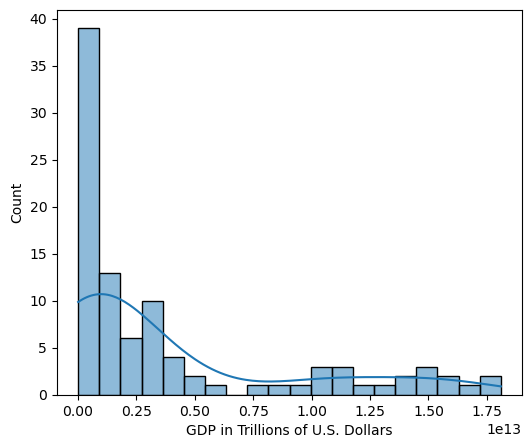

In [12]:
plt.figure(figsize=(6,5))
sns.histplot(data.GDP,kde=True,bins=20);
plt.xlabel("GDP in Trillions of U.S. Dollars")

In [13]:
print(data.GDP.describe())
print("mode     "+ str(stat.mode(data.GDP)))

count    9.600000e+01
mean     3.880499e+12
std      5.197561e+12
min      4.415703e+09
25%      1.733018e+11
50%      1.280220e+12
75%      4.067510e+12
max      1.810000e+13
Name: GDP, dtype: float64
mode     77860932152.0


El GDP tiene una distribución sesgada a la izquierda, lo que quiere decir que los datos se encuentran en su mayoría en la izquierda. Lo que concuerda con el orden ascendente de los siguientes valores: moda, mediana y media.

#### Distribución de la esperanza de vida.

Text(0.5, 0, 'Life expectancy at birth (years)')

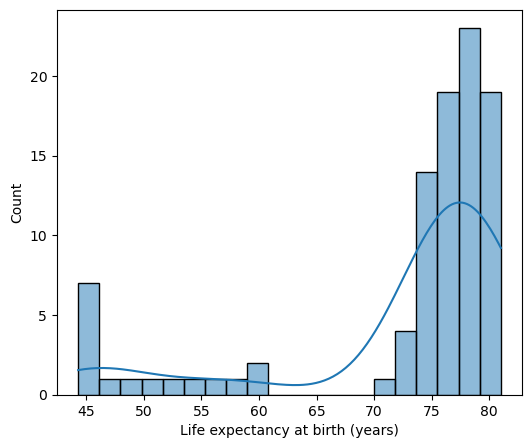

In [25]:
plt.figure(figsize=(6,5))
sns.histplot(data.Life_exp,kde=True,bins=20);
plt.xlabel("Life expectancy at birth (years)")

In [20]:
print(data.Life_exp.describe())
print("mode     "+ str(stat.mode(data.Life_exp)))

count    96.000000
mean     72.789583
std      10.672882
min      44.300000
25%      74.475000
50%      76.750000
75%      78.900000
max      81.000000
Name: Life_exp, dtype: float64
mode     75.0


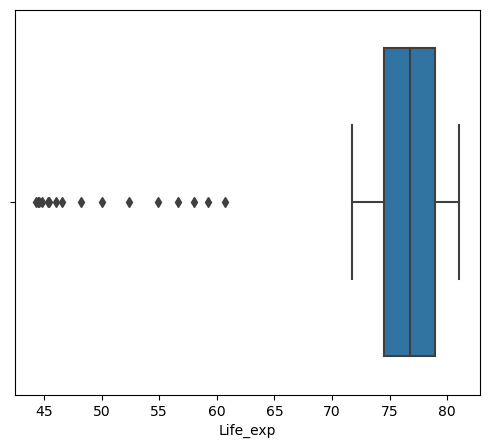

<Figure size 640x480 with 0 Axes>

In [24]:
plt.figure(figsize=(6,5))
sns.boxplot(x = "Life_exp", data = data)
plt.show()
plt.clf()

Al contrario de la distribución del GDP, la esperanza de vida esta sesgada a la izquierda lo que indica que la esperanza de vida se concentran entre los 74 y 78 años.

In [31]:
print("La media de la esperanza de vida de los 6 paises analizados es: " + str(round(data.Life_exp.mean(),2)) + " años.")

La media de la esperanza de vida de los 6 paises analizados es: 72.79 años.


#### Analizando media de esperanza de vida y GDP por país.

In [38]:
df_means = data.drop("Year",axis=1).groupby("Country").mean().reset_index()
df_means

,Country,Life_exp,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


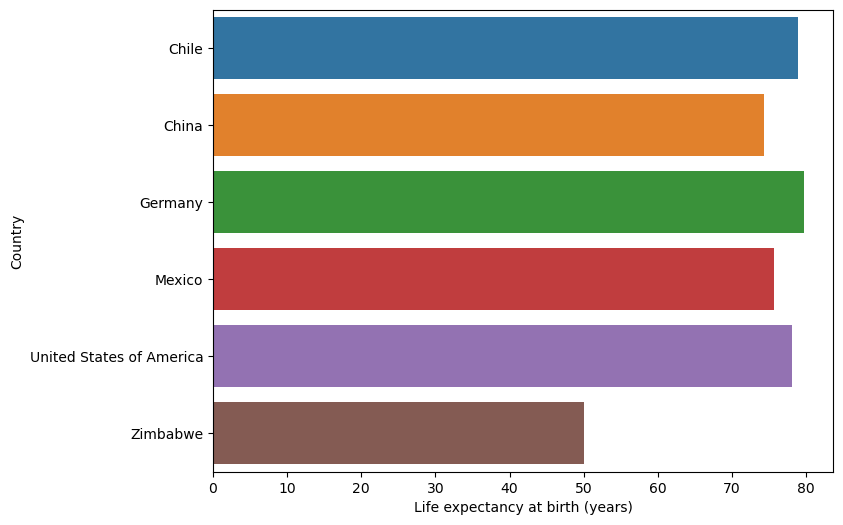

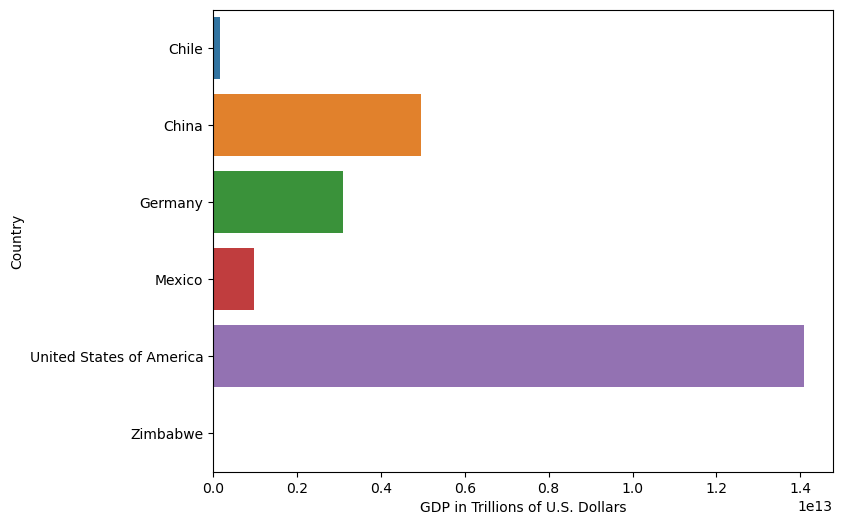

In [43]:
plt.figure(figsize=(8,6))
sns.barplot(x="Life_exp", y="Country", data=df_means)
plt.xlabel("Life expectancy at birth (years)");

plt.figure(figsize=(8,6))
sns.barplot(x="GDP", y="Country", data=df_means)
plt.xlabel("GDP in Trillions of U.S. Dollars");

De la primera gráfica se puede concluir:

In [51]:
print("El país con la esperanza de vida más baja es: " + str(df_means.Country[(np.argmin(df_means.Life_exp))]) +
      "\nCon un valor de: " + str(df_means.Life_exp[(np.argmin(df_means.Life_exp))]) +" años."
     "\nEl país con la esperanza de vida más alta es: " + str(df_means.Country[(np.argmax(df_means.Life_exp))]) +
      "\nCon un valor de: " + str(df_means.Life_exp[(np.argmax(df_means.Life_exp))]) + " años."
     )

El país con la esperanza de vida más baja es: Zimbabwe
Con un valor de: 50.09375 años.
El país con la esperanza de vida más alta es: Germany
Con un valor de: 79.65625 años.


El país con mayor crecimiento en su GDP es USA pero no es el país que lidera en la mejor esperanza de vida, sin embargo no se encuentra muy alejado de Germany.
Por otro lado, Zimbabwe ni siquiera es visible en el gráfico

#### Tendencia de esperanza de vida por país.

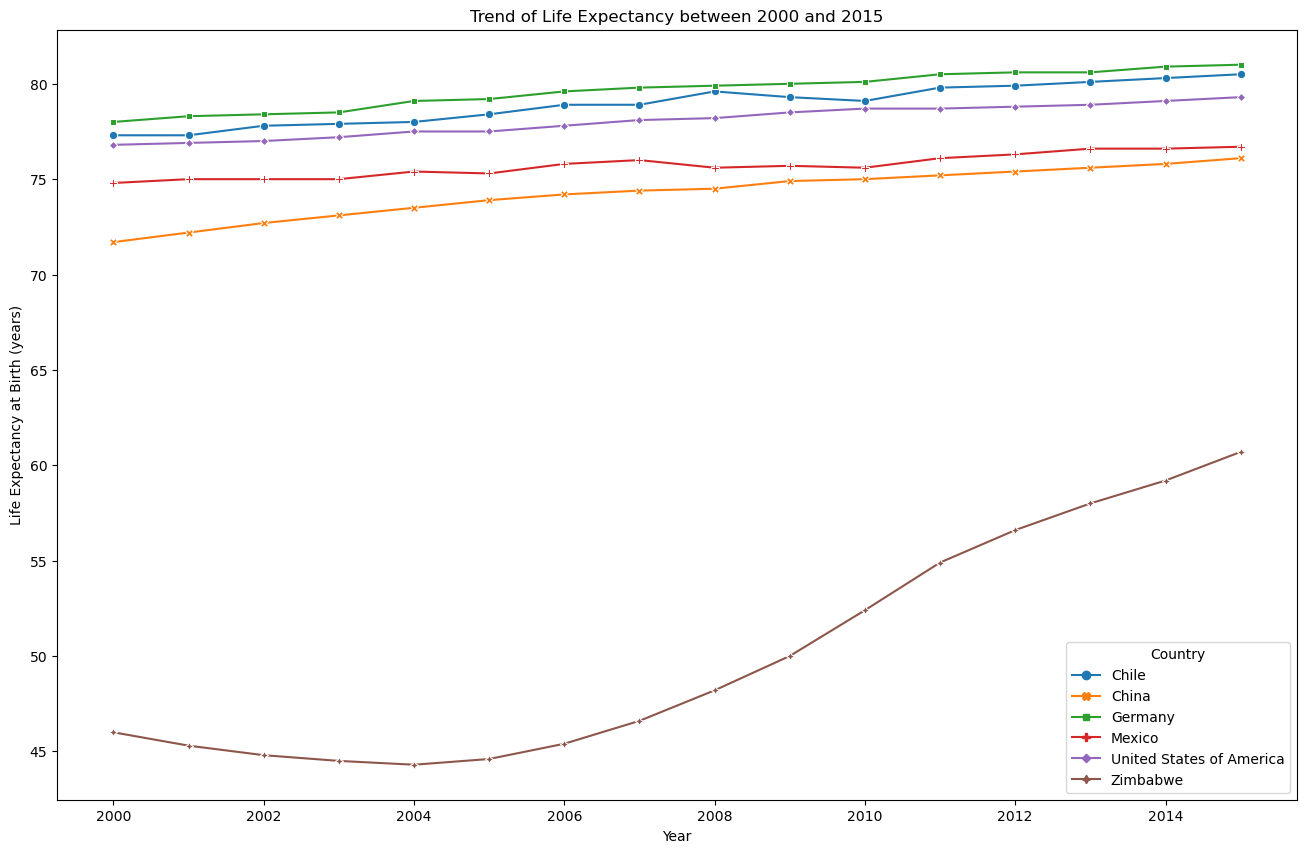

<Figure size 640x480 with 0 Axes>

In [53]:
plt.figure(figsize=(16,10))
ax = sns.lineplot(x = "Year", y = "Life_exp", data = data, hue = "Country", style = "Country" , markers = True, dashes = False)
plt.xlabel("Year")
plt.ylabel("Life Expectancy at Birth (years)")
plt.title("Trend of Life Expectancy between 2000 and 2015")
plt.show()
plt.clf()

En el diagrama de línea anterior muestra que la esperanza de vida de Zimbabwe aumento notablemente en comparación con otros países pero aún así , sigue siendo el país con la menor esperanza.Todos demás paises muestran un crecimiento continuo y se visualiza que del 2000 al 2015 el país con mejor esperana de vida es Alemania, seguido por Chile,USA,México y China.

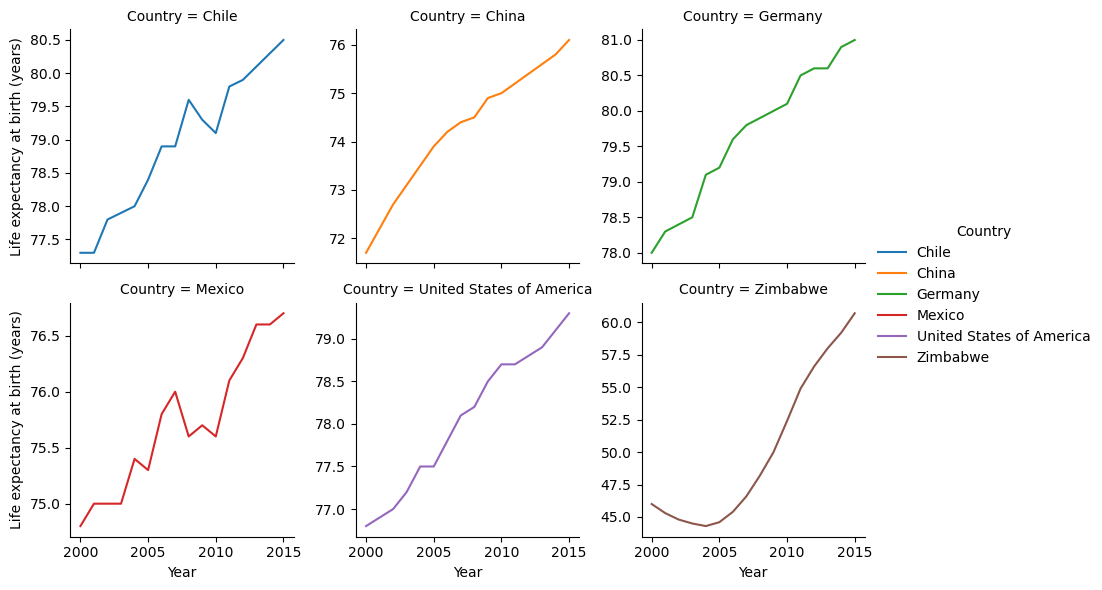

In [59]:
graphLife = sns.FacetGrid(data, col="Country", col_wrap=3, hue = "Country", sharey = False)

graphLife = (graphLife.map(sns.lineplot,"Year","Life_exp").add_legend().set_axis_labels("Year","Life expectancy at birth (years)"))

graphLife;

En los graficos particulares se puede observar que si bien Zimbabwe ha tenido el cambio más notable en la esperanza de vida, todos lo demás países también han tenido un crecimiento.

Se puede ver un crecimiento lineal en los siguientes paises: China, USA y Germany.

Hablando de México y China disminuyeron su esperanza de vida aproximadamente en el mismo periodo de tiempo.

#### Tendencia de GDP por país.

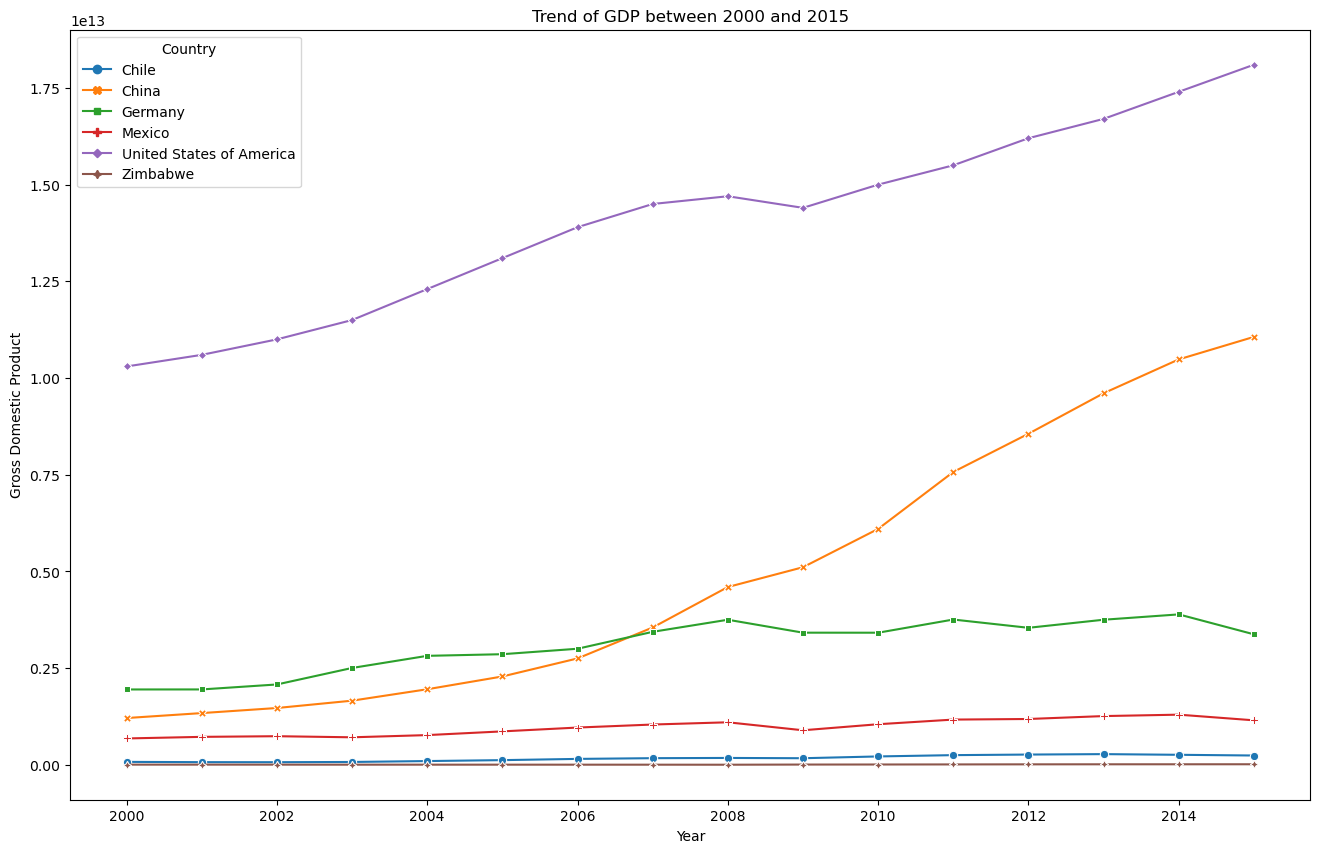

<Figure size 640x480 with 0 Axes>

In [63]:
plt.figure(figsize=(16,10))
ax = sns.lineplot(x = "Year", y = "GDP", data = data, hue = "Country", style =  "Country" , markers = True, dashes = False)
plt.xlabel("Year")
plt.ylabel("Gross Domestic Product")
plt.title("Trend of GDP between 2000 and 2015")
plt.show()
plt.clf()

En el diagrama de línea del GDP se observa que el país que ha tenido mayor crecimiento es USA, si bien Alemania es el país con la mejor esperanza de vida pero no con el mejor crecimiento del GDP. 

USA y China tienen un crecimiento de tres cuartos de trillón de dolares entre el 2000 y 2015.

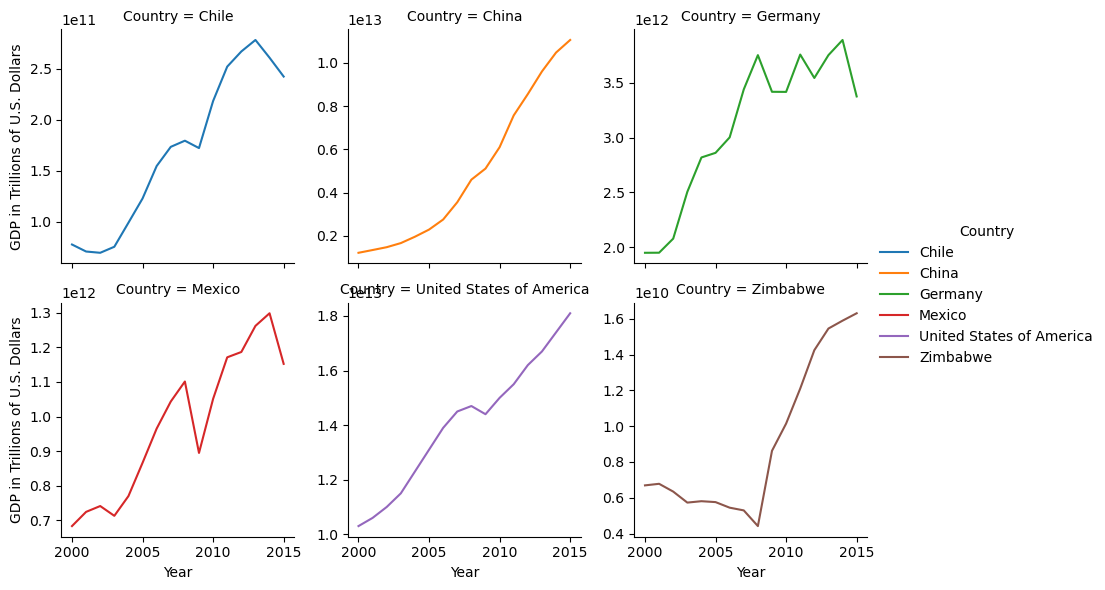

In [73]:
graphGDP = sns.FacetGrid(data, col="Country", col_wrap=3, hue = "Country", sharey = False)

graphGDP = (graphGDP.map(sns.lineplot,"Year","GDP").add_legend().set_axis_labels("Year","GDP in Trillions of U.S. Dollars"))

graphGDP;

Analizando individualmente el GDP por país, existe un aumento. Algo común es que la misma caída en la esperanza de vida y el GDP en el mismo periodo tiempo en México y Chile, coindice. Las graficas individuales de la esperanza de vida y GDP lucen similares. 

Nota: cada gráfica cuenta con diferente escala en trillones de dolares. (sharey = False)

#### Esperanza de vida VS GDP.

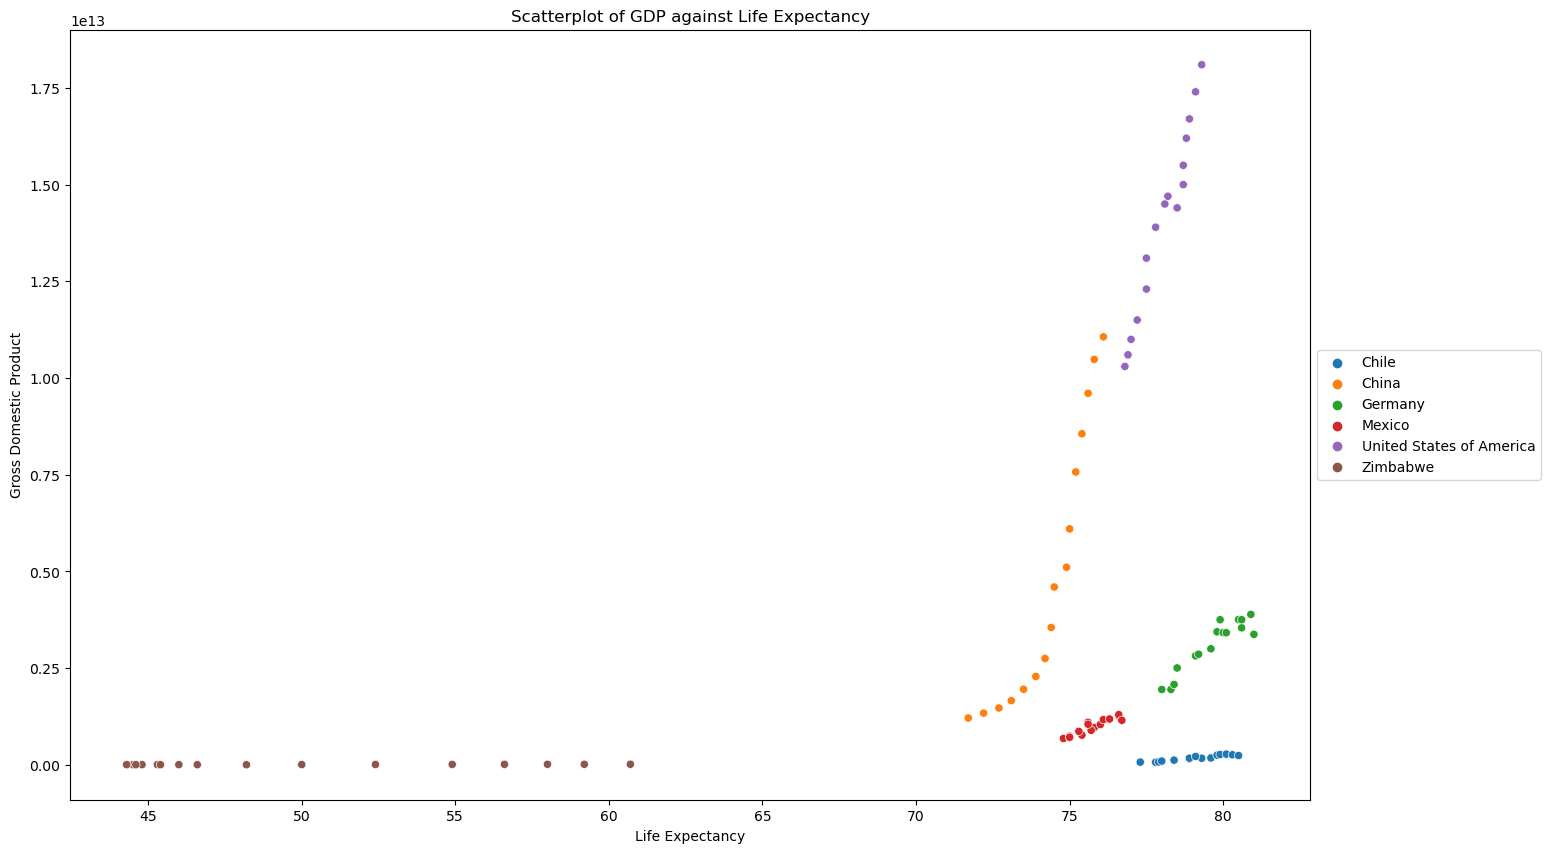

<Figure size 640x480 with 0 Axes>

In [67]:
plt.figure(figsize=(16,10))
sns.scatterplot(x = "Life_exp", y= "GDP", data = data, hue = "Country").legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1);
plt.xlabel("Life Expectancy")
plt.ylabel("Gross Domestic Product")
plt.title("Scatterplot of GDP against Life Expectancy")
plt.show()
plt.clf()

La gráfica anterior muestra una relación con el aumento de la esperanza de vida en los paises con mayor aumentos en el GDP, USA y China seguidos por Alemania y México.

Mientras que Chile y Zimbabwe se ve un avance casi constante pero se debe a que el crecimiento en el GDP en otros paises es mucho mayor en comparación a ello. A continuación se analizara indivudualmente.

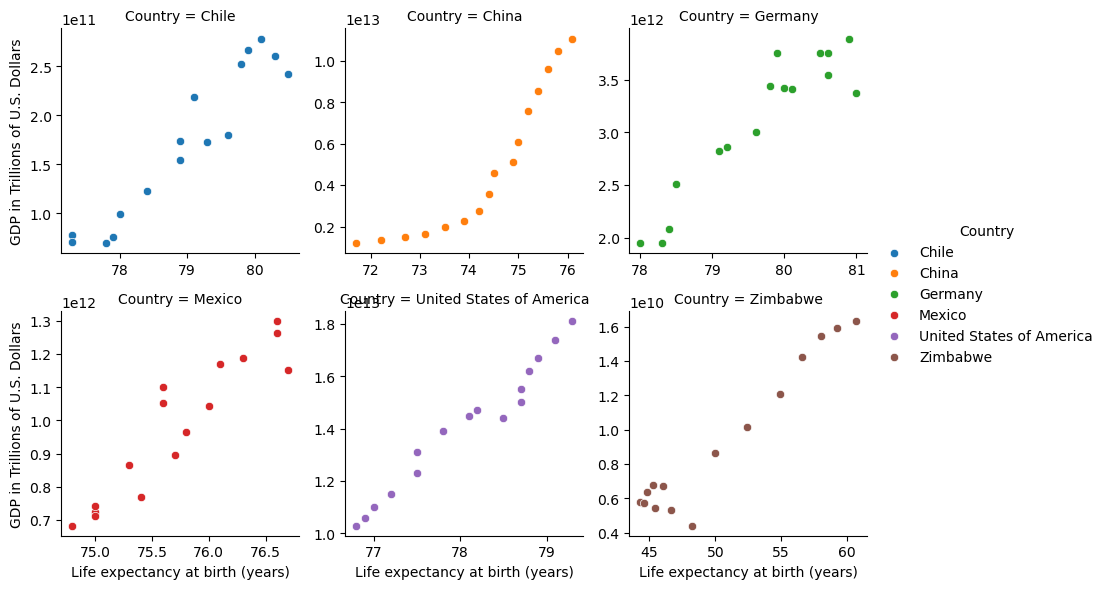

In [68]:
graph = sns.FacetGrid(data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"Life_exp", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"));


Se muestra que si hay una relación entre la esperanza de vida y el GDP. México,USA y Germany muestran una relación lineal, mientras que China muestra una forma exponencial igual que su cremiento en el GDP.

#### Matriz de correlación.

          Life_exp       GDP
Life_exp  1.000000  0.343207
GDP       0.343207  1.000000


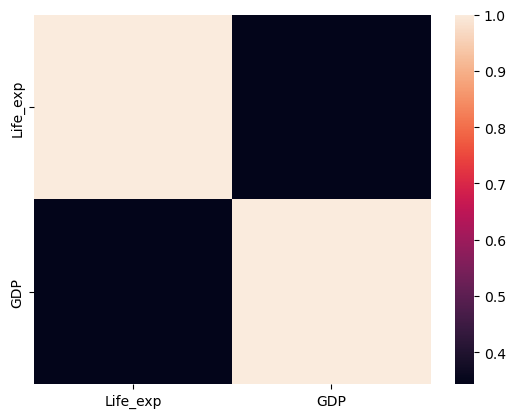

<Figure size 640x480 with 0 Axes>

In [71]:
print(data[["Life_exp","GDP"]].corr())
sns.heatmap(data[["Life_exp","GDP"]].corr())
plt.show()
plt.clf()

#### Conclusión.

- ¿Ha aumentado la esperanza de vida con el tiempo en las seis naciones?
  - Sí, el país con el mayor aumento es Zimbabwe. Pero aún es el país con la esperanza de vida más bajo. Todos los países tienen un aumento.
- ¿Ha aumentado el PIB con el tiempo en las seis naciones?
  - Sí, existe un aumento. Los países con mayor aumento es USA y China.
- ¿Existe una correlación entre el PIB y la esperanza de vida de un país?
  - Sí, existe una relación enre ambas variables en los países analizados aquí. Esta relación se observa en los graficos de dispersión y la matriz de correlación con un 34%.
- ¿Cuál es la esperanza de vida promedio en estas naciones?
  - La media de la esperanza de vida de los 6 paises analizados es: 72.79 años.
- ¿Cuál es la distribución de esa esperanza de vida?
  - La esperanza de vida tiene una distribución sesgada a la derecha, el rango intercuartil se encuentra entre los 74 y 78 años.